In [51]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [62]:
df = pd.read_excel("Superstore.xls")
#df.head()
furniture = df.loc[df['Category'] == 'Furniture']


In [53]:
furniture['Order Date'].min() 


Timestamp('2017-01-06 00:00:00')

In [54]:
furniture['Order Date'].max()

Timestamp('2020-12-30 00:00:00')

In [55]:
furniture.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country/Region    0
City              0
State             0
Postal Code       2
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [63]:
furniture = furniture.sort_values('Order Date')



In [57]:
#furniture = furniture.groupby('Order Date')
#furniture['Sales'].sum().reset_index()

In [64]:
furniture = furniture.set_index('Order Date')


In [65]:
furniture.index

DatetimeIndex(['2017-01-06', '2017-01-07', '2017-01-10', '2017-01-11',
               '2017-01-13', '2017-01-13', '2017-01-14', '2017-01-16',
               '2017-01-19', '2017-01-20',
               ...
               '2020-12-28', '2020-12-28', '2020-12-28', '2020-12-29',
               '2020-12-29', '2020-12-29', '2020-12-29', '2020-12-29',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=2121, freq=None)

In [67]:
y = furniture['Sales'].resample('MS').mean()
y

Order Date
2017-01-01    312.126250
2017-02-01    262.808286
2017-03-01    441.635030
2017-04-01    305.570654
2017-05-01    288.032792
2017-06-01    440.204187
2017-07-01    327.910636
2017-08-01    305.014437
2017-09-01    425.294300
2017-10-01    384.507719
2017-11-01    347.820527
2017-12-01    414.134682
2018-01-01    782.662773
2018-02-01    284.943091
2018-03-01    446.420821
2018-04-01    317.445409
2018-05-01    312.498350
2018-06-01    296.699192
2018-07-01    341.860500
2018-08-01    301.206006
2018-09-01    437.883717
2018-10-01    334.072875
2018-11-01    401.049773
2018-12-01    360.715925
2019-01-01    346.488318
2019-02-01    206.607947
2019-03-01    312.221756
2019-04-01    377.488286
2019-05-01    351.624070
2019-06-01    343.962421
2019-07-01    335.090231
2019-08-01    430.456286
2019-09-01    328.468445
2019-10-01    247.345354
2019-11-01    392.390479
2019-12-01    436.651369
2020-01-01    248.501333
2020-02-01    264.089900
2020-03-01    286.669600
2020-04-01    

In [69]:
y['2019':]

Order Date
2019-01-01    346.488318
2019-02-01    206.607947
2019-03-01    312.221756
2019-04-01    377.488286
2019-05-01    351.624070
2019-06-01    343.962421
2019-07-01    335.090231
2019-08-01    430.456286
2019-09-01    328.468445
2019-10-01    247.345354
2019-11-01    392.390479
2019-12-01    436.651369
2020-01-01    248.501333
2020-02-01    264.089900
2020-03-01    286.669600
2020-04-01    206.044502
2020-05-01    319.953928
2020-06-01    372.717386
2020-07-01    227.173500
2020-08-01    395.945487
2020-09-01    349.737422
2020-10-01    308.226313
2020-11-01    374.310253
2020-12-01    296.296857
Freq: MS, Name: Sales, dtype: float64

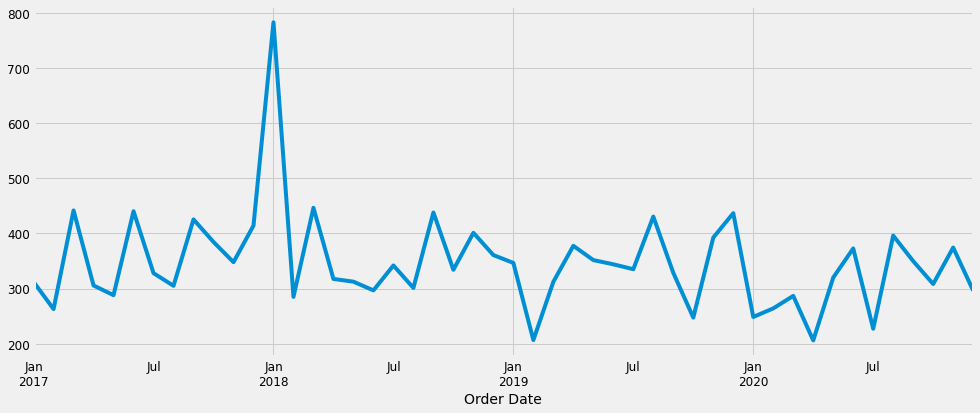

In [70]:
y.plot(figsize=(15, 6))
plt.show()

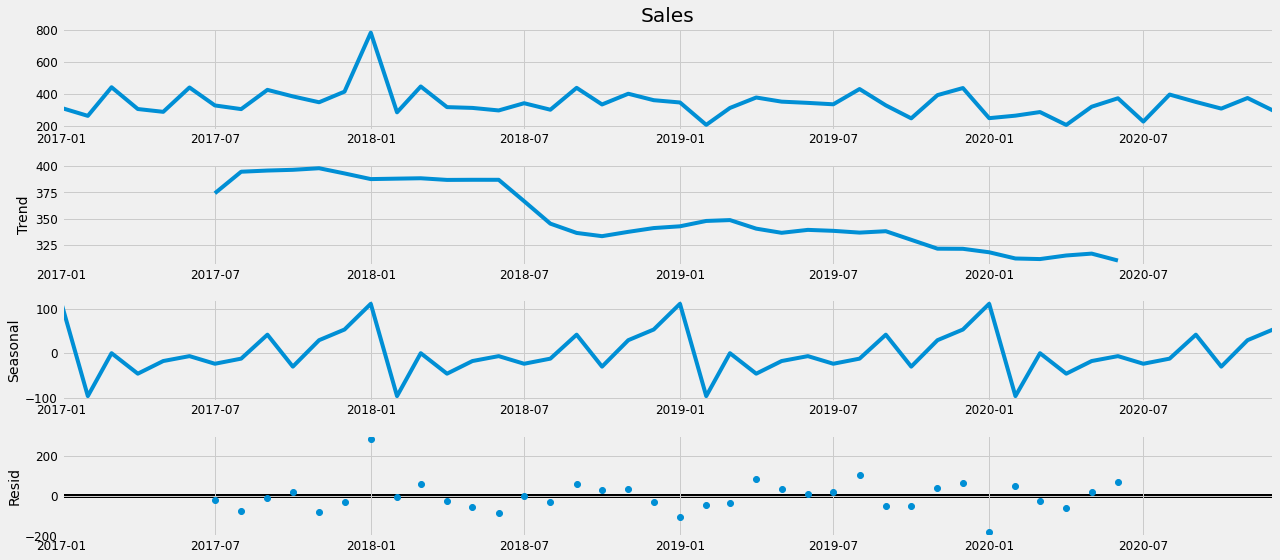

In [71]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [72]:
# Time series forecasting with ARIMA

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [80]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:688.3112416991725
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1646.7439753419608
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:426.20464898591723
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:272.0919847628289
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:452.8238602501692
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:421.17561100651056
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:295.446456472235
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:274.0919845632936
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:641.1240680666035
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2879.651347254237
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:416.5496453364634
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:262.52305170472647
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:455.17980511238835
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:411.5753261830107
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:297.4464066216518
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:264.5230013344616
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:580.6389269639644
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:668.363409605588
ARIMA(0

In [ ]:
# AIC 254.64 is the lowest, optimal solution ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:254.6420710853845

In [81]:
# Fitting the ARIMA model

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1886      0.314     -0.601      0.548      -0.803       0.426
ma.L1         -1.0000      0.447     -2.236      0.025      -1.877      -0.123
ar.S.L12      -0.0011      0.359     -0.003      0.998      -0.705       0.703
ma.S.L12      -0.0668      0.400     -0.167      0.867      -0.850       0.716
sigma2      6417.1574   6.97e-05   9.21e+07      0.000    6417.157    6417.158


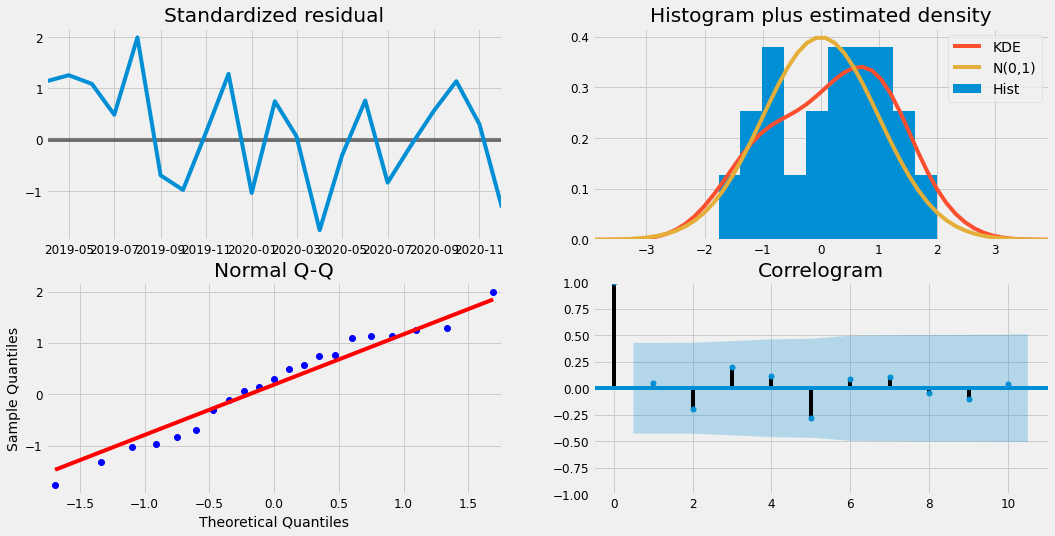

In [82]:
# diagnostic to observe unusual behaviour

results.plot_diagnostics(figsize=(16, 8))
plt.show()

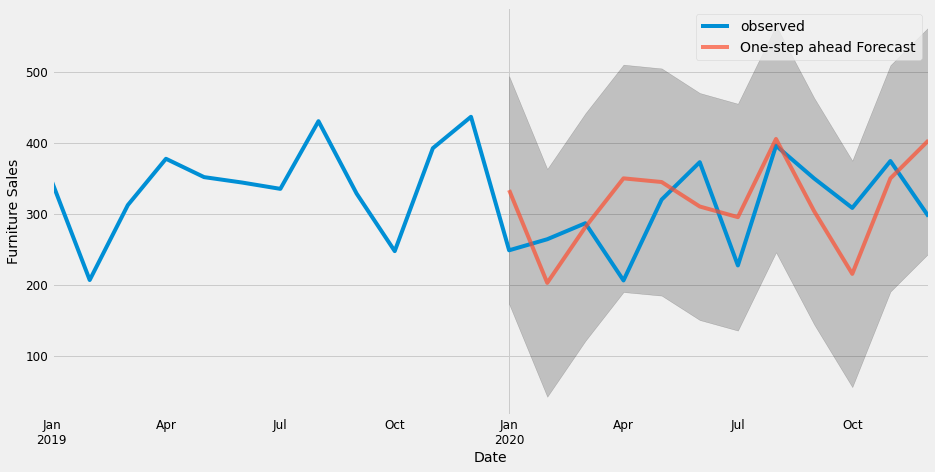

In [86]:
# validating forecats, start from 2020 

pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

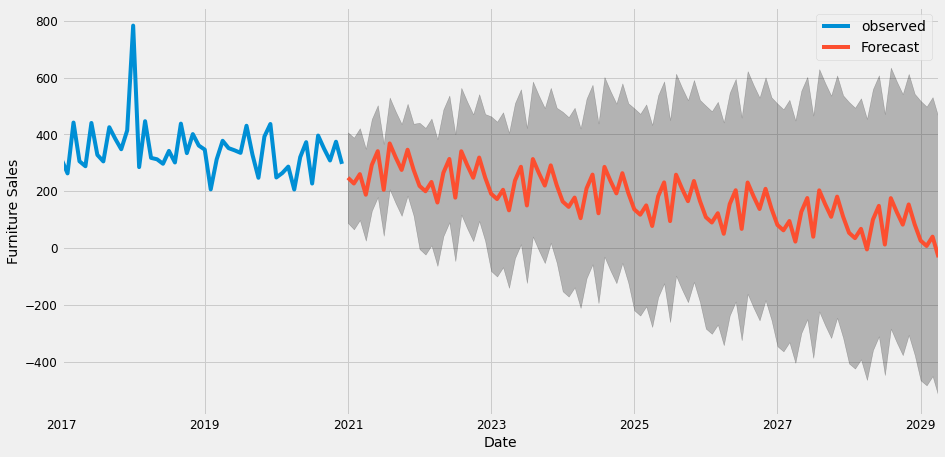

In [87]:
#Producing and visualizing forecasts

pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()